# Can't Spell Lakers Without An "L"

By Varun Ramani, William Liao, and Andrew Yuan (AKA Data Monkeys)

## Motivation

For a long time, the Los Angeles Lakers dominated the game of basketball. They are considered one of the greatest basketball franchises of all time, with players like Magic Johnson, Kobe Bryant, and Shaquille O'Neal all donning the purple and gold jerseys in their prime. In recent years, the Lakers have great players like LeBron James and Anthony Davis on their roster, and they became NBA champions in the 2019-2020 season, beating out 29 other teams for the title. However, the team's dominant reign sputtered and died humiliatingly - the Lakers failed to even make the playoffs this season (2021 - 2022). Lakers fans were obviously disappointed in this dramatic fall from grace in the span of just two years, and there were many articles written by sports critics and fans to try to pin the blame for this disastrous season.

* Article on Fadeaway World written by Eddie Bitar ([here](https://fadeawayworld.net/nba/5-reasons-why-the-lakers-season-has-been-a-disaster-lebron-westbrook-davis-are-all-at-fault))
* Los Angeles Sports Nation article on the Lakers season failure ([here](https://laxsportsnation.com/2022/04/11/goodbye-2021-2022-lakers-what-went-wrong/))
* FiveThirtyEight article on the Lakers season ([here](https://fivethirtyeight.com/features/this-lakers-season-was-a-trainwreck-and-theres-no-easy-way-to-get-back-on-track/))
* New York Post article on the future of the Lakers ([here](https://nypost.com/2022/04/06/whats-next-for-the-lakers-after-nba-playoff-elimination/))

The disastrous season has major implications as well. The head coach for the Lakers, Frank Vogel, has already been fired, and the Lakers are currently in search of a new head coach. Every trade season opens the door to exciting possibilities, and this year's trade season is especially important for the Lakers. The Lakers will need to accurately identify what went wrong during the season in order to make the fixes or trades necessary to return to the glory they basked in just two years ago.

After reading the sports journal articles above, our team boiled it down to four possible reasons / people to blame:

* Russell Westbrook, the big player acquisition that the Lakers made ahead of the 2021-22 season
* The overall Lakers defense / ability to prevent opposing teams from scoring
* Untimely injuries to star players like Anthony Davis and LeBron James
* Bad front-office trades resulting in a bad team composition

The team's objective is to use data and statistics to see if any of these reasons had significant statistical backing, and we hope you (the reader) are able to learn more about how to analyze data through Python, proving or disproving claims using statisitcs, while also gaining a better understanding of how data science can be applied to contexts such as sports and basketball.

## Question 1: Was It Russell Westbrook's Fault?

The biggest trade that the Lakers conducted coming into the 2021-22 season was that they traded away Kentavious Caldwell-Pope, Montrezl Harrell, and Kyle Kuzma to the Washington Wizards in exchange for Russell Westbrook. This is a big financial move from the Lakers as well, as they signed Westbrook to a $47 million deal (for three years). 

Many fans did not think that Russell Westbrook matched their expectations and that Westbrook should have delivered more based on the money that the Lakers are paying him. The fans have blamed Russell Westbrook as one of the causes of the Laker's underperformance this season, and this begs the question - did Russell Westbrook have a statistically abnormal season during his current tenure as a Laker, or did he perform about as well as he has been performing (AKA Lakers got what they paid for)?

Our null hypothesis in this instance would be that Russell Westbrook did not underperform significantly, and the fans would be correct if we are able to disprove the null hypothesis.

#### Data Collection
We retrieved all historical data for Russell Westbrook from [Basketball Reference](https://www.basketball-reference.com/players/w/westbru01.html). The dataset included data for all 14 seasons that Russell Westbrook has played in starting from the 2008-09 season to the 2021-22 season. There were multiple aggregate statistics (per season) included in the dataset that we could then analyze.

#### Data Management/Representation

Let's import the .csv file into Python. The library we chose to utilize is the Pandas library, which offers many useful tools for data science ([See Pandas documentation here](https://pandas.pydata.org/)). After we import it, let's take a quick glance at our data.

In [1]:
import pandas as pd
westbrook_stats = pd.read_csv("../Datasets/Westbrook Stuff/westbrook.csv")
westbrook_stats

,Season_Start,Season_End,Age,Tm,Lg,Pos,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2008,2009,20,OKC,NBA,PG,82,65,32.5,5.3,...,0.815,2.2,2.7,4.9,5.3,1.3,0.2,3.3,2.3,15.3
1,2009,2010,21,OKC,NBA,PG,82,82,34.3,5.9,...,0.780,1.7,3.1,4.9,8.0,1.3,0.4,3.3,2.5,16.1
2,2010,2011,22,OKC,NBA,PG,82,82,34.7,7.5,...,0.842,1.5,3.1,4.6,8.2,1.9,0.4,3.9,2.5,21.9
3,2011,2012,23,OKC,NBA,PG,66,66,35.3,8.8,...,0.823,1.5,3.1,4.6,5.5,1.7,0.3,3.6,2.2,23.6
4,2012,2013,24,OKC,NBA,PG,82,82,34.9,8.2,...,0.800,1.4,3.9,5.2,7.4,1.8,0.3,3.3,2.3,23.2
5,2013,2014,25,OKC,NBA,PG,46,46,30.7,7.5,...,0.826,1.2,4.5,5.7,6.9,1.9,0.2,3.8,2.3,21.8
6,2014,2015,26,OKC,NBA,PG,67,67,34.4,9.4,...,0.835,1.9,5.4,7.3,8.6,2.1,0.2,4.4,2.7,28.1
7,2015,2016,27,OKC,NBA,PG,80,80,34.4,8.2,...,0.812,1.8,6.0,7.8,10.4,2.0,0.3,4.3,2.5,23.5
8,2016,2017,28,OKC,NBA,PG,81,81,34.6,10.2,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
9,2017,2018,29,OKC,NBA,PG,80,80,36.4,9.5,...,0.737,1.9,8.2,10.1,10.3,1.8,0.3,4.8,2.5,25.4


In [2]:
westbrook_stats.isnull().values.any()

False

Nice! We've got a dataframe with no missing values and also has 31 columns with most of them being player statistics that we can look at. The column headers are abbreviated, but we can always look back at our original Basketball Reference source to find what the abbreviations mean. 

#### Exploratory Analysis

First, let's examine the points per game that Russell Westbrook averaged over each season that he played in. In basketball, you win if you outscore the other team, so it makes sense to take a look at Russell Westbrook's point-scoring ability. 

We import matplotlib to help us visualize the data. Matplotlib is a Python library that can be used to create all sorts of graphs and visualizations ([Read more here](https://matplotlib.org/)). Using the .plot() function, we specify the columns to plot, and also using other matplotlib functions to specify graph titles and axis labels ([Learn more about setting graph titles / labels here](https://www.w3schools.com/python/matplotlib_labels.asp)).

Text(0.5, 1.0, 'Points Per Game for Russell Westbrook Over His Career')

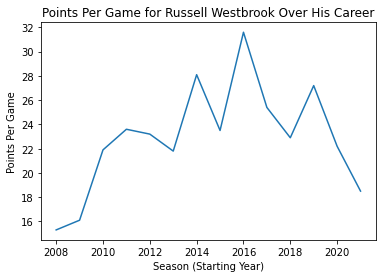

In [3]:
import matplotlib.pyplot as plt

plt.plot(westbrook_stats["Season_Start"], westbrook_stats["PTS"])
plt.xlabel("Season (Starting Year)")
plt.ylabel("Points Per Game")
plt.title('Points Per Game for Russell Westbrook Over His Career')

Looks like Westbrook did have a scoring drop in 2021! What are some other statistics that may be worth looking at? Well, considering a big controversy this season was that Lakers fan dubbed Westbrook 'Westbrick' ([News Article on Westbrick nickname](https://nba.nbcsports.com/2022/03/08/russell-westbrook-says-he-can-no-longer-tolerate-westbrick-nickname/)), we should look at effective field goal percentage to see if Westbrook truly 'bricks' his shots this season. 

Field goal percentage is calculated by shots made divided by shots attempted. However, in the game of basketball, there are 2-point field goals and 3-point field goals, 3 pointers being much more difficult to make than 2 pointers in most cases. Because of this, across the board players have lower three point percentages than two pointer percentages. So the effective field goal percentage adjusts for this difference by weighting three point percentage less than two point percentage so players are penalized less for taking difficult shots. Effective field goal percentage is calculated by 2-point field goals + 0.5 * 3-point field goals divided by total field goal attempts. 

Text(0.5, 1.0, 'Effective Field Goal Percentage for Russell Westbrook Over His Career')

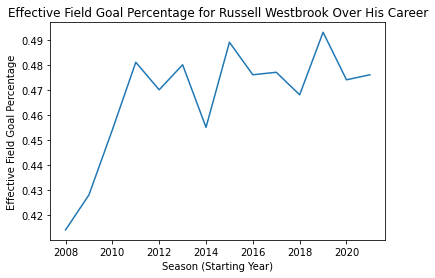

In [4]:
plt.plot(westbrook_stats["Season_Start"], westbrook_stats["eFG%"])
plt.xlabel("Season (Starting Year)")
plt.ylabel("Effective Field Goal Percentage")
plt.title('Effective Field Goal Percentage for Russell Westbrook Over His Career')

We've looked at Westbrook's ability to score. How about his ability to prevent the opposing team from scoring? One big statistic we can look at is turnovers per game. A turnover is defined as a player giving up the ball to the opposing team before their team is able to attempt a shot. If players have high turnovers, then they are giving up the ball often and giving the other team more chances to score. 

Text(0.5, 1.0, 'Turnovers Per Game for Russell Westbrook Over His Career')

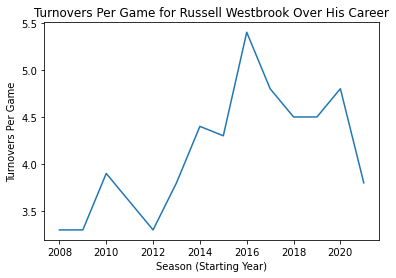

In [5]:
plt.plot(westbrook_stats["Season_Start"], westbrook_stats["TOV"])
plt.xlabel("Season (Starting Year)")
plt.ylabel("Turnovers Per Game")
plt.title('Turnovers Per Game for Russell Westbrook Over His Career')

Another way to look at a player's defensive ability is to look at their defensive box plus/minus score. The defensive box plus/minus score is calculated with a long formula ([See how it is calculated here](https://hackastat.eu/en/learn-a-stat-box-plus-minus-and-vorp/)) but in short, the box score estimates the defensive points per 100 possessions a player contributed above a league-average player, translated to an average team. 

Text(0.5, 1.0, 'Defensive Box +/- Score for Russell Westbrook Over His Career')

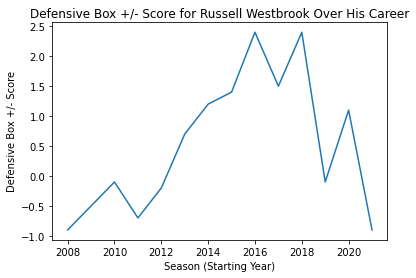

In [7]:
westbrook_advanced_stats = pd.read_csv("../Datasets/Westbrook Stuff/westbrook_advanced.csv")

plt.plot(westbrook_advanced_stats["Season_Start"], westbrook_advanced_stats["DBPM"])
plt.xlabel("Season (Starting Year)")
plt.ylabel("Defensive Box +/- Score")
plt.title('Defensive Box +/- Score for Russell Westbrook Over His Career')

#### Hypothesis Testing

As a reminder, our null hypothesis is that Russell Westbrook did not have a statistically abnormal season - in other words, he played in line with what he been doing in previous seasons. 

We've chosen the above four statistics to focus on due to reasons outlined in the markdown cells in the Exploratory Analysis section - two statistics look at offensive capabilities while two statistics look at defensive capabilities. 

Our approach is now to look at how far the 2021-22 performance deviated from the expected performance. In mathematical terms, how many standard deviations from the mean was Westbrook's performance? The standard value is if a datapoint is three standard deviations away from the mean, it is considered an outlier. You can read more on this approach [here](https://docs.oracle.com/cd/E40248_01/epm.1112/cb_statistical/frameset.htm?ch07s02s10s01.html).

In [8]:
# Calculate the mean and standard deviation for each of the statistics we're interested in

statistics_without_20_21_season = westbrook_stats[westbrook_stats["Season_Start"] != 2021]

ppg_mean = statistics_without_20_21_season["PTS"].mean()
ppg_sd = statistics_without_20_21_season["PTS"].std()

efg_mean = statistics_without_20_21_season["eFG%"].mean()
efg_sd = statistics_without_20_21_season["eFG%"].std()

tov_mean = statistics_without_20_21_season["TOV"].mean()
tov_sd = statistics_without_20_21_season["TOV"].std()

advanced_statistics_without_20_21_season = westbrook_advanced_stats[
    westbrook_advanced_stats["Season_Start"] != 2021]

dbpm_mean = advanced_statistics_without_20_21_season["DBPM"].mean()
dbpm_sd = advanced_statistics_without_20_21_season["DBPM"].std()

In [9]:
westbrook_20_21 = westbrook_stats.iloc[13]

ppg_20_21 = westbrook_20_21["PTS"]
efg_20_21 = westbrook_20_21["eFG%"]
tov_20_21 = westbrook_20_21["TOV"]

adv_westbrook_20_21 = westbrook_advanced_stats.iloc[13]
dbpm_20_21 = adv_westbrook_20_21["DBPM"]

print("Points Per Game: " + str(abs(ppg_20_21 - ppg_mean)/ppg_sd) + " standard deviations away from the mean")
print("Effective Field Goal Percentage: " + str(abs(efg_20_21 - efg_mean)/efg_sd) + " standard deviations away from the mean")
print("Turnovers Per Game: " + str(abs(tov_20_21 - tov_mean)/tov_sd) + " standard deviations away from the mean")
print("Defensive Box +/- Score: " + str(abs(dbpm_20_21 - dbpm_mean)/dbpm_sd) + " standard deviations away from the mean")

Points Per Game: 1.0873155067000648 standard deviations away from the mean
Effective Field Goal Percentage: 0.4297851611157377 standard deviations away from the mean
Turnovers Per Game: 0.5163836127856927 standard deviations away from the mean
Defensive Box +/- Score: 1.3553313531838171 standard deviations away from the mean


#### Insights Gained

As you can see with our calculations, Westbrook's performance this season is actually pretty in line with his historical performance. His defensive box +/- is the most standard deviations away from the mean, but even then, he is only 1.355 standard deviations from his own historical mean. Therefore, we are unable to reject the null hypothesis and definitively pin the blame on Russell Westbrook. 

## Question 2: Did Bad Lakers Defense Cripple the Lakers?

Many fans have been vocally critical about the Laker's defensive abilities this year. Namely, Lakers have made trades to create a team that fans have deemed more offense-oriented as opposed to defense-oriented. However, is there statistical backing that the Lakers defense was considerably worse this year?

#### Data Collection

We used a Kaggle dataset ([here](https://www.kaggle.com/datasets/nathanlauga/nba-games)) for data on all NBA games (not just Lakers games) from the 2004 season to the 2021 season. The dataset also included data such as points each team scored during the game, as well as overall team statistics per game. 

#### Data Management/Representation

One of the most direct ways of assessing a team's defensive abilities is to look at how much the opposing team scored against the team in each game. If you have good defense, you should be stopping the other team from scoring points. Therefore, we want to look at the historic games the Lakers have played, and look at how many points the opposing team has scored against the Lakers. To assess Lakers defense using this metric, we are assuming that the opposing team have the same offensive capabilities throughout (they are scoring more against the Lakers because Lakers defense got worse, and not because the team got better at scoring).

Keeping this assumption in mind, we chose to look at data from the previous ten years over the alternative of looking at every single datapoint we have because there is great variability between a team now and that same team forty years ago. For example, the Detroit Pistons are not very good currently, but were championship contenders in the 1980s. 

In [10]:
import pandas as pd
games = pd.read_csv("../Datasets/Defense/games.csv")
games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25794,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


Now, we want to extract all the games that the Laker's were apart of (both home games and visiting games). We first find the team ID for the Lakers by examining the "game_details.csv" file also made available to us through Kaggle. Afterwards, we filter for Lakers games.  

We also noted that we want to look at data from the ten seasons prior to the 2021 season to benchmark the Laker's defensive abilities in 2021. Therefore, we filter for that as well. 

In [11]:
LAKERS_TEAM_ID = 1610612747

laker_games = games.loc[(games["HOME_TEAM_ID"] == LAKERS_TEAM_ID) | (games["VISITOR_TEAM_ID"] == LAKERS_TEAM_ID)]

laker_games_last_ten = laker_games[laker_games["SEASON"] > 2010]

laker_games_last_ten

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
16,2022-03-11,22101004,Final,1610612747,1610612764,2021,1610612747,122.0,0.527,0.706,...,25.0,37.0,1610612764,109.0,0.459,0.667,0.333,21.0,47.0,1
23,2022-03-09,22100985,Final,1610612745,1610612747,2021,1610612745,139.0,0.510,0.947,...,25.0,50.0,1610612747,130.0,0.465,0.692,0.383,25.0,48.0,1
42,2022-03-07,22100973,Final,1610612759,1610612747,2021,1610612759,117.0,0.548,0.533,...,28.0,47.0,1610612747,110.0,0.473,0.696,0.308,19.0,43.0,1
58,2022-03-05,22100959,Final,1610612747,1610612744,2021,1610612747,124.0,0.494,0.857,...,25.0,47.0,1610612744,116.0,0.500,0.474,0.441,22.0,41.0,1
74,2022-03-03,22100945,Final,1610612746,1610612747,2021,1610612746,132.0,0.548,0.867,...,32.0,46.0,1610612747,111.0,0.488,0.773,0.343,26.0,36.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25726,2014-10-19,11400082,Final,1610612747,1610612762,2014,1610612747,98.0,0.400,0.867,...,18.0,37.0,1610612762,91.0,0.485,0.714,0.333,21.0,40.0,1
25744,2014-10-16,11400064,Final,1610612747,1610612762,2014,1610612747,86.0,0.410,0.581,...,15.0,41.0,1610612762,119.0,0.512,0.692,0.444,30.0,50.0,0
25763,2014-10-12,11400042,Final,1610612747,1610612744,2014,1610612747,75.0,0.366,0.882,...,17.0,37.0,1610612744,116.0,0.562,0.677,0.394,33.0,44.0,0
25777,2014-10-09,11400026,Final,1610612747,1610612744,2014,1610612747,105.0,0.438,0.722,...,22.0,42.0,1610612744,120.0,0.560,0.667,0.571,27.0,39.0,0


Looks like we have 965 Laker games to look at! However, let's tidy up this data a bit first. Since we now have just Lakers data, we don't really want to keep looking at HOME_TEAM_ID and VISITING_TEAM_ID. We would much rather look at a column containing OPPOSING_TEAM_ID. Additionally, we have a HOME_TEAM_WINS column that we would like to convert into a LAKERS_WIN column. Also, we want to create OPPOSING_TEAM_SCORE since our current dataframe has PTS_home and PTS_away instead. 

Let's make those columns now!

In [12]:
def get_opposing_team (row):
    if row["HOME_TEAM_ID"] == LAKERS_TEAM_ID:
        return row["VISITOR_TEAM_ID"]
    else:
        return row["HOME_TEAM_ID"]

laker_games_last_ten["OPPOSING_TEAM_ID"] = laker_games_last_ten.apply( lambda row: get_opposing_team(row), axis = 1)

def get_lakers_win (row):
    if row["HOME_TEAM_ID"] == LAKERS_TEAM_ID:
        return row["HOME_TEAM_WINS"]
    else:
        return 1 if (row["HOME_TEAM_WINS"] == 0) else 0

laker_games_last_ten["LAKERS_WIN"] = laker_games_last_ten.apply( lambda row: get_lakers_win(row), axis = 1)

def get_opposing_team_score (row):
    if row["HOME_TEAM_ID"] == LAKERS_TEAM_ID:
        return row["PTS_away"]
    else:
        return row["PTS_home"]

laker_games_last_ten["OPPOSING_PTS"] = laker_games_last_ten.apply( lambda row: get_opposing_team_score(row), axis = 1)

laker_games_last_ten

C:\Users\andre\AppData\Local\Temp\ipykernel_21864\1259888413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laker_games_last_ten["OPPOSING_TEAM_ID"] = laker_games_last_ten.apply( lambda row: get_opposing_team(row), axis = 1)
C:\Users\andre\AppData\Local\Temp\ipykernel_21864\1259888413.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laker_games_last_ten["LAKERS_WIN"] = laker_games_last_ten.apply( lambda row: get_lakers_win(row), axis = 1)
C:\Users\andre\AppData\Local\Temp\ipykernel_21864\1259888413

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,OPPOSING_TEAM_ID,LAKERS_WIN,OPPOSING_PTS
16,2022-03-11,22101004,Final,1610612747,1610612764,2021,1610612747,122.0,0.527,0.706,...,109.0,0.459,0.667,0.333,21.0,47.0,1,1610612764,1,109.0
23,2022-03-09,22100985,Final,1610612745,1610612747,2021,1610612745,139.0,0.510,0.947,...,130.0,0.465,0.692,0.383,25.0,48.0,1,1610612745,0,139.0
42,2022-03-07,22100973,Final,1610612759,1610612747,2021,1610612759,117.0,0.548,0.533,...,110.0,0.473,0.696,0.308,19.0,43.0,1,1610612759,0,117.0
58,2022-03-05,22100959,Final,1610612747,1610612744,2021,1610612747,124.0,0.494,0.857,...,116.0,0.500,0.474,0.441,22.0,41.0,1,1610612744,1,116.0
74,2022-03-03,22100945,Final,1610612746,1610612747,2021,1610612746,132.0,0.548,0.867,...,111.0,0.488,0.773,0.343,26.0,36.0,1,1610612746,0,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25726,2014-10-19,11400082,Final,1610612747,1610612762,2014,1610612747,98.0,0.400,0.867,...,91.0,0.485,0.714,0.333,21.0,40.0,1,1610612762,1,91.0
25744,2014-10-16,11400064,Final,1610612747,1610612762,2014,1610612747,86.0,0.410,0.581,...,119.0,0.512,0.692,0.444,30.0,50.0,0,1610612762,0,119.0
25763,2014-10-12,11400042,Final,1610612747,1610612744,2014,1610612747,75.0,0.366,0.882,...,116.0,0.562,0.677,0.394,33.0,44.0,0,1610612744,0,116.0
25777,2014-10-09,11400026,Final,1610612747,1610612744,2014,1610612747,105.0,0.438,0.722,...,120.0,0.560,0.667,0.571,27.0,39.0,0,1610612744,0,120.0


Lastly, let's remove some columns that we will have no use for.

In [13]:
cleaned_lakers = laker_games_last_ten[['GAME_DATE_EST', 'GAME_ID', 'SEASON', 'OPPOSING_TEAM_ID', 'LAKERS_WIN', 'OPPOSING_PTS']].copy()

cleaned_lakers

,GAME_DATE_EST,GAME_ID,SEASON,OPPOSING_TEAM_ID,LAKERS_WIN,OPPOSING_PTS
16,2022-03-11,22101004,2021,1610612764,1,109.0
23,2022-03-09,22100985,2021,1610612745,0,139.0
42,2022-03-07,22100973,2021,1610612759,0,117.0
58,2022-03-05,22100959,2021,1610612744,1,116.0
74,2022-03-03,22100945,2021,1610612746,0,132.0
...,...,...,...,...,...,...
25726,2014-10-19,11400082,2014,1610612762,1,91.0
25744,2014-10-16,11400064,2014,1610612762,0,119.0
25763,2014-10-12,11400042,2014,1610612744,0,116.0
25777,2014-10-09,11400026,2014,1610612744,0,120.0


#### Exploratory Analysis

Let's explore our data a bit. Let's plot the opposing team scores per season, and also color code the points - green if the Lakers won, and red if the Lakers lost.

Text(0.5, 1.0, 'Scores of All Teams Faced by the Lakers in the Past Five Seasons')

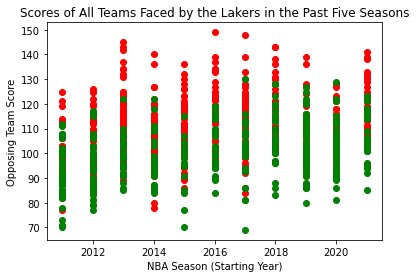

In [14]:
import matplotlib.pyplot as plt

wins_df = cleaned_lakers[cleaned_lakers["LAKERS_WIN"] == 1]  
lose_df = cleaned_lakers[cleaned_lakers["LAKERS_WIN"] == 0]
plt.scatter(lose_df["SEASON"], lose_df["OPPOSING_PTS"], color = 'red')  
plt.scatter(wins_df["SEASON"], wins_df["OPPOSING_PTS"], color = 'green')

plt.xlabel("NBA Season (Starting Year)")
plt.ylabel("Opposing Team Score")
plt.title('Scores of All Teams Faced by the Lakers in the Past Five Seasons')

A quick look at our scatter plot confirms the relationship between the opposing team's score and the team's chance of winning - if the opposing team scores less, than your team would more likely win. To better see the distribution of points, let's add jitter to the points so that points are not overlapping! To do so, we will have to import the seaborn library. You can learn more about seaborn [here](https://seaborn.pydata.org/).

Text(0.5, 1.0, 'Scores of All Teams Faced by the Lakers in the Past Five Seasons')

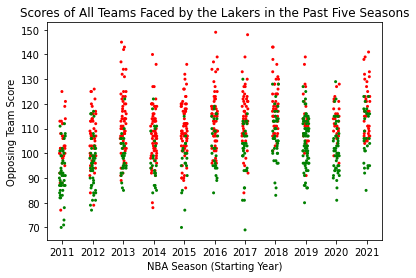

In [16]:
import seaborn as sns

jitter_graph = sns.stripplot(data =lose_df, x="SEASON", y="OPPOSING_PTS", jitter=0.1, size=3, color = 'red')
jitter_graph = sns.stripplot(data =wins_df, x="SEASON", y="OPPOSING_PTS", jitter=0.1, size=3, color = 'green')

jitter_graph.set_xlabel("NBA Season (Starting Year)")
jitter_graph.set_ylabel("Opposing Team Score")
jitter_graph.set_title('Scores of All Teams Faced by the Lakers in the Past Five Seasons')

We must also note that some teams are simply better than others - we can't expect to compare the Laker's ability to defend against reigning conference champions against their ability to defend against teams who've not made the playoffs in years. Therefore, we choose to look at the Laker's performance against each team over the past five seasons instead. Let's calculate the average points scored against the Lakers by team per season!

In [21]:
unique_years = cleaned_lakers["SEASON"].unique()
teams = cleaned_lakers["OPPOSING_TEAM_ID"].unique()

team_score_map = {}
for team in teams:
    team_df = cleaned_lakers[cleaned_lakers.OPPOSING_TEAM_ID == team]
    scores_per_year = {}
    for year  in unique_years:
        curr_df = team_df[team_df.SEASON == year]
        average_score = curr_df["OPPOSING_PTS"].mean()
        scores_per_year[year] = average_score
    team_score_map[team] = scores_per_year

team_score_map

{1610612764: {2021: 109.0,
  2020: 121.5,
  2019: 109.5,
  2013: 116.5,
  2012: 99.5,
  2011: 106.0,
  2018: 117.0,
  2017: 105.0,
  2016: 117.5,
  2015: 102.5,
  2014: 104.5},
 1610612745: {2021: 116.0,
  2020: 108.0,
  2019: 108.5,
  2013: 122.5,
  2012: 108.75,
  2011: 106.0,
  2018: 123.5,
  2017: 121.75,
  2016: 129.0,
  2015: 118.75,
  2014: 99.66666666666667},
 1610612759: {2021: 120.5,
  2020: 109.33333333333333,
  2019: 100.66666666666667,
  2013: 108.75,
  2012: 99.14285714285714,
  2011: 105.66666666666667,
  2018: 124.75,
  2017: 101.66666666666667,
  2016: 116.0,
  2015: 110.5,
  2014: 100.66666666666667},
 1610612744: {2021: 117.2,
  2020: 100.75,
  2019: 102.28571428571429,
  2013: 106.28571428571429,
  2012: 105.4,
  2011: 97.5,
  2018: 112.0,
  2017: 118.25,
  2016: 116.5,
  2015: 106.16666666666667,
  2014: 118.66666666666667},
 1610612746: {2021: 116.75,
  2020: 105.0,
  2019: 106.75,
  2013: 122.0,
  2012: 108.6,
  2011: 104.6,
  2018: 114.2,
  2017: 110.6,
  2016: 

This hashmap isn't nice to look at. Let's create a dataframe from this hashmap so that we can plot / analyze the data easier.

In [26]:
avg_score_df = pd.DataFrame.from_records(team_score_map)
year = [2021, 2020, 2019, 2013, 2012, 2011, 2018, 2017, 2016, 2015, 2014]
avg_score_df["Year"] = year

sorted_avg_score = avg_score_df.sort_values(by=['Year'])

sorted_avg_score

,1610612737,1610612738,1610612739,1610612740,1610612741,1610612742,1610612743,1610612744,1610612745,1610612746,...,1610612758,1610612759,1610612760,1610612761,1610612762,1610612763,1610612764,1610612765,1610612766,Year
2011,78.0,90.5,92.0,92.333333,88.0,90.500000,95.545455,97.500000,106.000000,104.60,...,106.666667,105.666667,101.125000,92.0,89.250000,98.333333,106.0,88.0,73.0,2011
2012,97.0,107.5,96.5,97.750000,88.0,92.000000,115.000000,105.400000,108.750000,108.60,...,99.857143,99.142857,112.000000,112.0,101.800000,98.666667,99.5,88.0,96.5,2012
2013,108.5,98.0,114.0,107.666667,97.0,113.333333,113.400000,106.285714,122.500000,122.00,...,103.800000,108.750000,117.500000,106.0,100.666667,97.750000,116.5,100.5,97.5,2013
2014,100.0,112.0,114.5,105.500000,115.5,115.500000,104.800000,118.666667,99.666667,110.75,...,104.000000,100.666667,113.000000,108.0,96.200000,103.000000,104.5,90.5,98.0,2014
2015,103.0,105.5,120.0,99.000000,120.0,95.000000,115.000000,106.166667,118.750000,98.25,...,115.000000,110.500000,116.750000,103.0,103.500000,113.000000,102.5,98.0,104.5,2015
2016,105.0,114.0,122.0,101.250000,104.0,113.500000,117.600000,116.500000,129.000000,115.75,...,99.666667,116.000000,110.666667,118.0,100.250000,102.666667,117.5,111.5,113.0,2016
2017,108.5,107.0,117.0,128.666667,98.5,106.500000,114.500000,118.250000,121.750000,110.60,...,92.000000,101.666667,108.000000,112.0,107.500000,106.750000,105.0,102.5,103.5,2017
2018,111.5,124.0,103.0,113.250000,103.5,104.333333,116.600000,112.000000,123.500000,114.20,...,109.200000,124.750000,118.000000,116.0,105.000000,101.666667,117.0,105.5,107.5,2018
2019,98.5,125.5,99.0,111.500000,112.0,108.200000,111.888889,102.285714,108.500000,106.75,...,115.333333,100.666667,112.250000,110.0,96.666667,102.250000,109.5,99.0,101.0,2019
2020,99.0,108.0,97.0,107.000000,102.5,112.666667,101.333333,100.750000,108.000000,105.00,...,109.000000,109.333333,108.000000,111.0,113.333333,97.000000,121.5,118.0,99.0,2020


Text(0.5, 1.0, 'Scores of All Teams Faced by the Lakers in the Past Five Seasons')

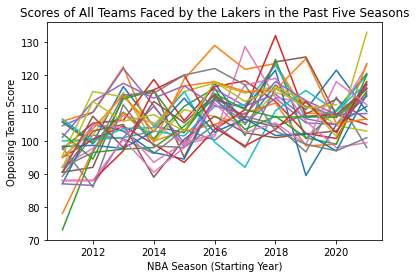

In [27]:
for team in teams:
    plt.plot(sorted_avg_score["Year"], sorted_avg_score[team]) 

plt.xlabel("NBA Season (Starting Year)")
plt.ylabel("Opposing Team Score")
plt.title('Scores of All Teams Faced by the Lakers in the Past Five Seasons') 

#### Hypothesis Testing

As a reminder, our null hypothesis is that the Lakers did not have a team with statistically worse defensive abilities than in previous years. 